# TDEs with Strong Coronal Lines

Spectra from T.-G. Wang et al., "Extreme Coronal Line Emitters: Tidal Disruption of Stars by Massive Black
Holes in Galactic Nuclei," ApJ **749**:[115](https://iopscience.iop.org/article/10.1088/0004-637X/749/2/115), 2012, [arXiv:1202.1064](https://arxiv.org/abs/1202.1064).

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from astropy.table import Table

mpl.rc('font', size=14)

## SDSS Spectra

Spectra queried using the SDSS [SkyServer](http://skyserver.sdss.org/dr16/en/tools/search/SQS.aspx) and downloaded from the [Science Archive Server](https://dr14.sdss.org/optical/spectrum/view).

In [2]:
spectra = {'spec-1737-53055-0369.fits':'SDSS J074820.66+471214.6',
           'spec-2580-54092-0470.fits':'SDSS J093801.64+135317.0',
           'spec-2295-53734-0017.fits':'SDSS J095209.56+214313.3',
           'spec-0907-52373-0419.fits':'SDSS J105526.43+563713.3',
           'spec-1372-53062-0072.fits':'SDSS J124134.26+442639.2',
           'spec-0854-52373-0369.fits':'SDSS J134244.42+053056.1',
           'spec-2114-53848-0443.fits':'SDSS J135001.49+291609.7'}

coadd = Table.read('spec-1737-53055-0369.fits', 'COADD')
coadd

flux,loglam,ivar,and_mask,or_mask,wdisp,sky,model
float32,float32,float32,int32,int32,float32,float32,float32
17.464697,3.5809,0.13074915,0,0,1.0417457,5.6178403,17.745237
19.34147,3.581,0.1707403,0,0,1.0415895,6.019876,18.01753
18.36448,3.5811,0.18248963,0,0,1.041429,5.909394,18.383066
17.569143,3.5812,0.1712047,0,0,1.0412681,5.7368174,18.377144
23.129448,3.5813,0.16307473,0,0,1.041109,5.6200223,18.769081
19.685144,3.5814,0.17608953,0,0,1.0409477,5.352119,19.031837
16.93657,3.5815,0.18599094,0,0,1.0407872,5.096571,19.031506
14.20041,3.5816,0.19510919,0,0,1.0406266,4.803501,19.14494
17.172495,3.5817,0.18020527,0,0,1.0404661,4.5818167,19.403477


## Plotting Code

Plot spectra individually.

In [3]:
def plot_spectra(filename, objname):
    coadd = Table.read(filename, 'COADD')
    
    fig, axes = plt.subplots(1,2, figsize=(11,4.5), sharex=True, sharey=True)

    wave = 10**coadd['loglam']
    flux = coadd['flux']
    model = coadd['model']

    ax = axes[0]
    ax.plot(wave, flux, label='flux')
    ax.set(xlabel='$\lambda_\mathrm{obs}$ [$\AA$]',
           ylabel='flux [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]')
    ax.legend(fontsize=12)

    ax = axes[1]
    ax.plot(wave, model, label='model')
    ax.set(xlabel='$\lambda_\mathrm{obs}$ [$\AA$]')
    ax.legend(fontsize=12)

    fig.suptitle(objname)
    fig.tight_layout()
    fig.subplots_adjust(top=0.9)

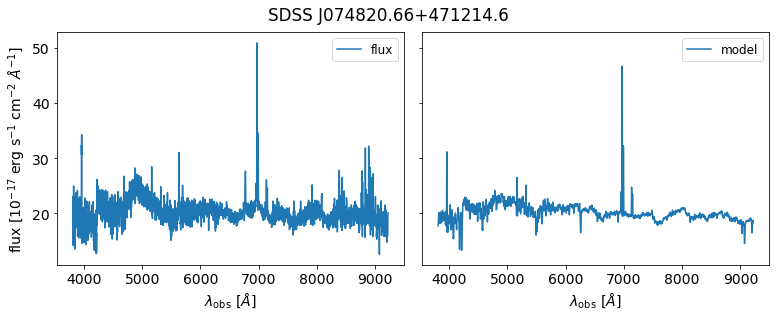

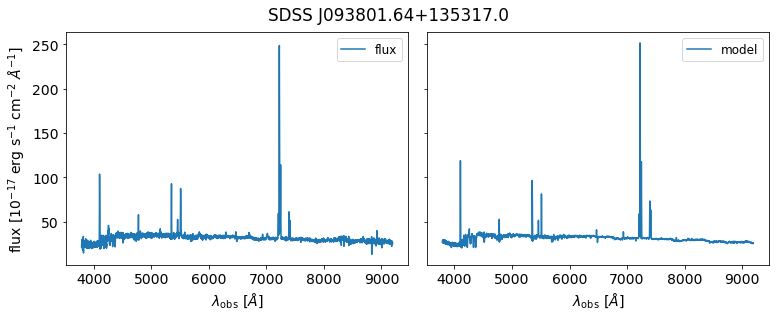

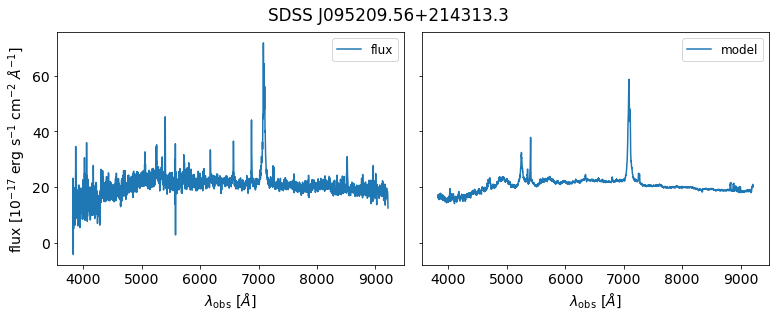

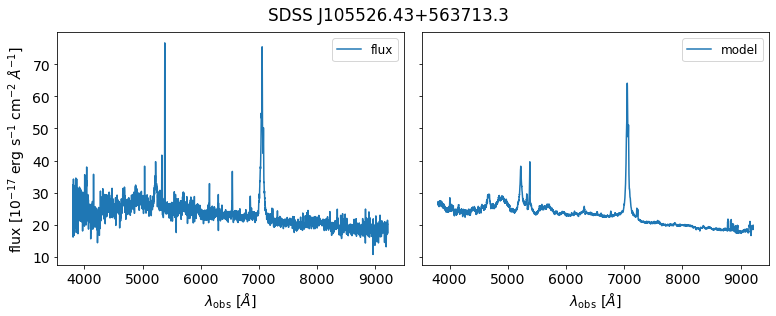

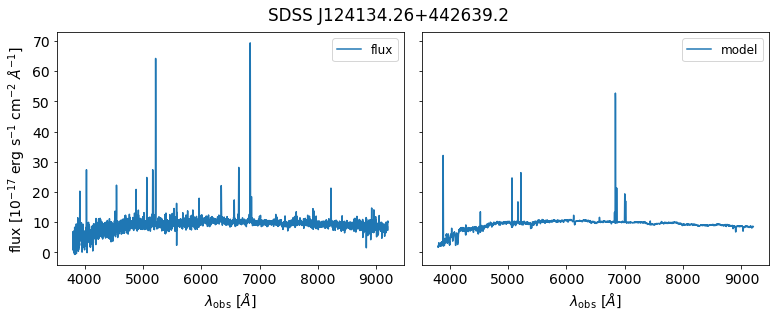

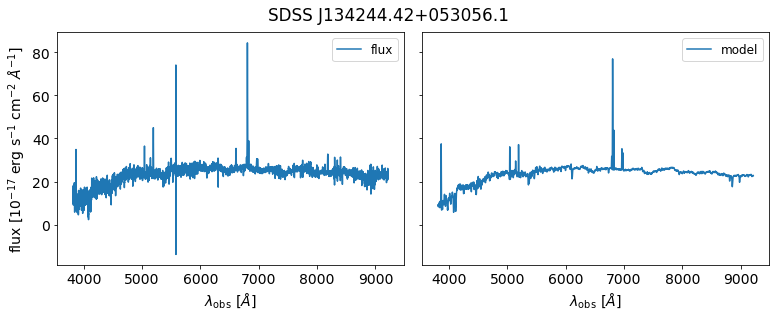

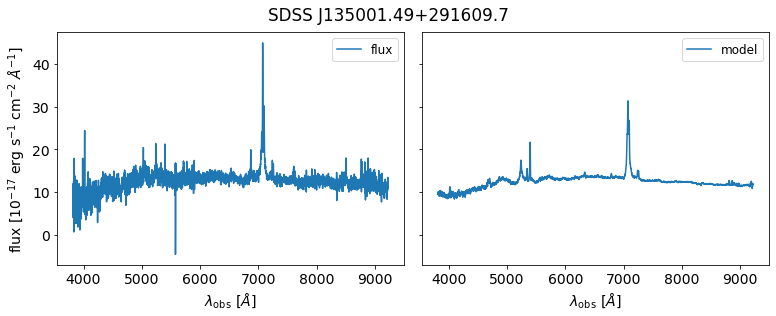

In [4]:
for filename, objname in spectra.items():
    plot_spectra(filename, objname)

## Stacked Plot

Plot all 7 coronal line emitters in a stacked plot and include a list of emission lines. Reproduces figure 1 of Wang et al.

SDSS J074820.66+471214.6 20.115524
SDSS J093801.64+135317.0 31.556162
SDSS J095209.56+214313.3 20.77759
SDSS J105526.43+563713.3 23.42009
SDSS J124134.26+442639.2 9.424446
SDSS J134244.42+053056.1 24.047363
SDSS J135001.49+291609.7 12.558365


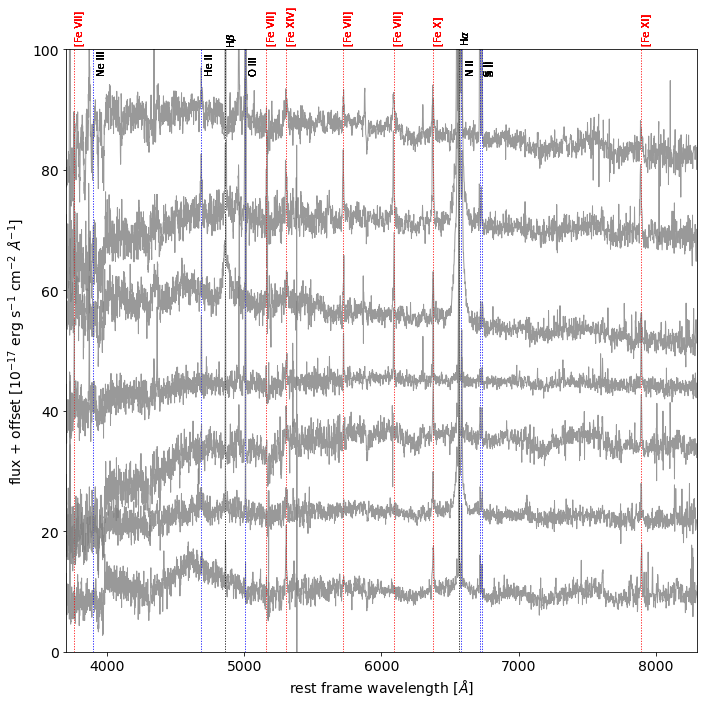

In [5]:
# Fe coronal line fluxes.
fe_lines = {3759 : '[Fe VII]',
            5160 : '[Fe VII]',
            5722 : '[Fe VII]',
            6088 : '[Fe VII]',
            6376 : '[Fe X]',
            7894 : '[Fe XI]',
            5304 : '[Fe XIV]'}

# Balmer lines
bm_lines = {6563 : r'H$\alpha$',
            4861 : r'H$\beta$'}

# Other emission lines
em_lines = {4686 : 'He II',
            6583 : 'N II',
            6716 : 'S II',
            6731 : 'S II',
            5007 : 'O III',
            3896 : 'Ne III'}

# Flux offsets for plotting.
offsets = { '0748':-10, 
            '1350':10,
            '1342':10,
            '1241':35,
            '1055':33,
            '0952':50,
            '0938':55
          }

def getoffset(obj):
    for o in offsets.keys():
        if o in obj:
            return offsets[o]
    return 0

fig, ax = plt.subplots(1,1, figsize=(10,10))

for i, (filename, objname) in enumerate(spectra.items()):
    specobj = Table.read(filename, 'SPECOBJ')
    z = specobj['Z']
    
    coadd = Table.read(filename, 'COADD')
    wave = 10**coadd['loglam'] / (1 + z)
    flux = coadd['flux']
    model = coadd['model']
    
    ax.plot(wave, flux + getoffset(objname),
            color='gray',
            lw=1, alpha=0.8)
    
    # Add coronal lines.
    for wl, fe_line in fe_lines.items():
        ax.axvline(wl, ls=':', color='r', alpha=0.2, lw=1)
        ax.text(wl, 101, fe_line, color='r', fontsize=10, fontstyle='normal', rotation=90)
        
    # Add Balmer lines.
    for wl, bm_line in bm_lines.items():
        ax.axvline(wl, ls=':', color='k', alpha=0.2, lw=1)
        ax.text(wl, 101, bm_line, fontsize=10, fontstyle='normal', rotation=90)
        
    # Add other emission lines.
    for wl, em_line in em_lines.items():
        ax.axvline(wl, ls=':', color='b', alpha=0.2, lw=1)
        ax.text(wl+30, 96, em_line, fontsize=10, fontstyle='normal', rotation=90)
    
    print(objname, np.median(flux))
    
ax.set(xlim=(3700,8300),
       xlabel='rest frame wavelength [$\AA$]',
       ylim=(0,100),
       ylabel='flux + offset [$10^{-17}$ erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$]')

fig.tight_layout()

## Line Fluxes

Fe and other emission line fluxes from Wang et al., Tables 2 and 3.

In [6]:
# Table 1
# Basic Data of the Extreme Coronal Line Emitters
# 
# No.	Name	Type^a	z	M_i, tot	R_50	Deltag^b	Deltar^a	Deltai^b	Deltat^c	
# 				(mag)	(arcsec)	(mag)	(mag)	(mag)	(day)	
# 1	SDSS J074820.66+471214.6	No	0.0615	-19.75	4.88	0.23 +or- 0.04	0.09 +or- 0.03	0.13 +or- 0.04	120	
# 2	SDSS J093801.64+135317.0	Yes	0.1006	-21.29	3.77	<0.22	<0.16	<0.14	326	
# 3	SDSS J095209.56+214313.3	Yes	0.0789	-20.41	3.51	-0.33 +or- 0.03	-0.19 +or- 0.04	-0.27 +or- 0.04	375	
# 4	SDSS J105526.43+563713.3	Yes	0.0743	-20.01	3.71	-0.20 +or- 0.07	-0.14 +or- 0.04	-0.16 +or- 0.05	140	
# 5	SDSS J124134.26+442639.2	Yes	0.0419	-19.95	11.10	<0.13	<0.12	<0.12	340	
# 6	SDSS J134244.42+053056.1	No	0.0366	-18.91	4.21	<0.30	<0.23	<0.22	386	
# 7	SDSS J135001.49+291609.7	No	0.0777	-19.76	0.45	0.12 +or- 0.04	<0.12	<0.13	701	
# 
# Notes.
# a The type denotes whether [Fe vii] is present or not.
# b Magnitude difference within the fiber aperture of 3 arcsec between the SDSS spectroscopic
#   and imaging observations. A negative value means that the object was brighter at the epoch
#   of the imaging observation than at the epoch of the spectroscopic observation, and vice versa.
# c Elapsed time between the SDSS imaging and spectroscopic observations.



# Table 2
# Fe Coronal Line Fluxes^a
#
# No.	[Fe VII]lambda3759	[Fe VII]lambda5160	[Fe VII]lambda5722	[Fe VII]lambda6088	[Fe X]lambda6376	[Fe XI]lambda7894	[Fe XIV]lambda5304	log EM^b
	
# 1	<18	<12	<21	<21	138 +or- 11	111 +or- 21	88 +or- 6	61.20	
# 2	54 +or- 7	30 +or- 10	63 +or- 16	97 +or- 9	87 +or- 7	55 +or- 8	80 +or- 21	61.42	
# 3	134 +or- 12	41 +or- 17	98 +or- 6	129 +or- 6	219 +or- 8	164 +or- 9	86 +or- 9	61.70	
# 4	89 +or- 8	38 +or- 12	59 +or- 5	108 +or- 6	69 +or- 5	68 +or- 8	37 +or- 10	61.22	
# 5	47 +or- 5	<6	35 +or- 4	58 +or- 2	94 +or- 4	86 +or- 7	28 +or- 3	61.06	
# 6	<12	<18	<15	<9	57 +or- 4	72 +or- 5	36 +or- 4	60.66	
# 7	<9	<9	<6	<6	39 +or- 3	50 +or- 5	20 +or- 3	60.83	

# Notes.
# a Line fluxes and 3sigma upper limits are in units of 10-17 erg cm-2 s-1, and only statistical errors are
#   quoted.
# b Gas emissivity in units of cm-3 obtained by summing over the emissivities of [Fe x]lambda6376,
#   [Fe xi]lambda7894, and [Fe xiv]lambda5304 divided by the abundance of Fe. A typical uncertainty
#   is estimated to be from 0.1 to 0.3 dex without taking into account of ionization fraction
#   corrections and uncertainties in the atomic data.



# Table 3
# Other Emission Lines
#
# No.	Hbeta^n	Hbeta^b	Halpha^n	Halpha^b	He II lambda4686	[N II]lambda6583	[S II]lambda6716	[S II]lambda6731	[O III]lambda5007	[Ne III]lambda3896	
# 1	46 +or- 4	<33	213 +or- 17	<57	<9	54 +or- 3	60 +or- 5	25 +or- 2	14 +or- 2	<9	
# 2	384 +or- 7	<64	1766 +or- 25	100 +or- 33	12 +or- 5	695 +or- 20	247 +or- 5	171 +or- 4	452 +or- 23	119 +or- 15	
# 3	142 +or- 47	179 +or- 58	226 +or- 18	1592 +or- 36	89 +or- 13	110 +or- 16	101 +or- 10	43 +or- 4	161 +or- 6	54 +or- 11	
# 4	53 +or- 19	499 +or- 37	336 +or- 51	1704 +or- 61	22 +or- 4	74 +or- 7	23 +or- 3	26 +or- 3	219 +or- 6	56 +or- 6	
# 5	66 +or- 5	<38	329 +or- 7	<39	41 +or- 3	40 +or- 5	8 +or- 1	10 +or- 2	212 +or- 4	81 +or- 7	
# 6	80 +or- 4	<72	401 +or- 8	67 +or- 22	20 +or- 3	78 +or- 4	48 +or- 4	32 +or- 3	104 +or- 3	<27	
# 7	53 +or- 17	83 +or- 24	221 +or- 29	467 +or- 37	<9	96 +or- 9	52 +or- 7	24 +or- 3	44 +or- 2	<9	
#
# Note.
# a Line fluxes are in units of 10-17 erg cm-2 s-1.